In [ ]:
!pip install numpy
!pip install matplotlib

In [5]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

MPAM Generator

The constelation of reference is:  [-3. -1.  1.  3.]


<ipython-input-28-f953e896b448>:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  sim = plt.semilogy(SNRdB,pe,'mx-')


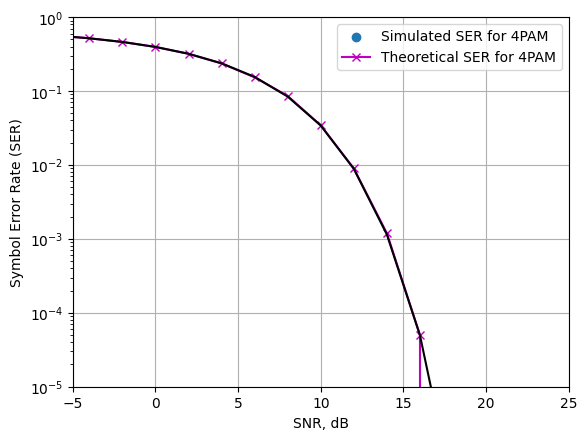

In [28]:
# Modulation order
M = 4

# Number of transmitted symbols
N = 100000

# References's constelation
x_ref = np.array([])
y_ref = np.array([])

for i in range(M):
  l = 2*i-M+1
  x_ref = np.append(x_ref,l)
  y_ref = np.append(y_ref,0)

print("The constelation of reference is: ", x_ref)
plt.scatter(x_ref,y_ref)

E = np.sum(pow(np.abs(x_ref),2))/M
SNRdB = np.arange(-10,20,2)
SNR = pow(10,SNRdB/10)

x = np.array([])
y = np.array([])

x_ref = x_ref/np.sqrt(E)
sigma = np.sqrt(1/(2*SNR))

d = np.zeros(M)
y_hat = np.zeros(N)
pe = np.zeros(len(SNRdB))
count_sym_err = np.zeros(len(SNRdB))

for k in range(len(SNRdB)):
  x = np.repeat(x_ref,N/M)
  np.random.shuffle(x)

  #v = np.random.uniform(0,4,1)
  v = np.random.normal(0,sigma[k],N)

  y = x + v

  for kk in range(N):
    for kkk in range(M):
      d[kkk] = np.linalg.norm(y[kk]-x_ref[kkk])
    index_min = np.argmin(d)
    y_hat[kk] = x_ref[index_min]
    if y_hat[kk] != x[kk]:
     count_sym_err[k] = count_sym_err[k] + 1

  pe[k] = count_sym_err[k]/N
  #print(pe[k])

pe_t = ((2*(M-1))/M)*(1/2)*special.erfc(np.sqrt(((6*SNR)/((M ** 2)-1))/(2)))
plt.semilogy(SNRdB,pe,'mx-')
plt.semilogy(SNRdB,pe_t,'k-')
plt.legend(['Simulated SER for '+ str(M) +'PAM','Theoretical SER for '+ str(M) +'PAM'])
plt.xlabel('SNR, dB')
plt.ylabel('Symbol Error Rate (SER)')
plt.grid(True)
plt.axis([-5, 25, 10**(-5), 1])
plt.show()